# This is a repository containing regression from simple regression to deep learning models

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
#Reading data
df = pd.read_csv('dataset.csv')

In [3]:
#Checking data
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [5]:
df.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [6]:
#Incase of having missing data
df.fillna(0)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [7]:
#Importing scaler to normalize the data
from sklearn.preprocessing import MinMaxScaler

In [8]:
#Using scaler to normalize the data
scaler = MinMaxScaler()

df['SAT'] = scaler.fit_transform(df[['SAT']])
df['GPA'] = scaler.fit_transform(df[['GPA']])

df.describe()

,SAT,GPA
count,84.000000,84.000000
mean,0.507870,0.659743
std,0.251276,0.192636
min,0.000000,0.000000
25%,0.331731,0.560284
50%,0.509615,0.695035
75%,0.721154,0.781915
max,1.000000,1.000000


In [9]:
#Splitting train and test data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['SAT'], df['GPA'], test_size=0.33, random_state=7)

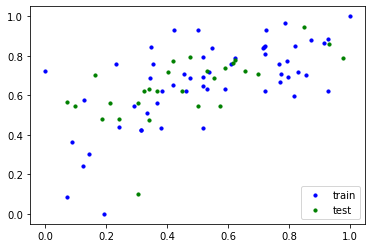

In [10]:
%matplotlib inline
#Ploting data
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_train, y_train, s=10, c='b',  label='train')
ax1.scatter(x_test, y_test, s=10, c='g',  label='test')
plt.legend(loc='lower right');
plt.show()

In [11]:
#Mean inialization without using deviation
def initialize_params(x,y):
    w,b = np.mean(y)/np.mean(x), 0
    return w, b

In [12]:
#Calulating loss using SME
def cost(y,y_hat):
    m = len(y)
    J = (1/(2*m))*np.sum((y-y_hat)**2)
    return J
#Updating the parameters
def gradient_descent(x,y_hat,y,w,b,lr):
    m = len(x)
    w -= lr*(1/m) * np.sum((y_hat-y)*x)
    b -= lr*(1/m) * np.sum(y_hat-y)
    return w,b
#Appling linear function (for readability)
def linear_regression(w,x,b):
    return w*x+b

In [13]:
w, b = initialize_params(x_train,y_train)

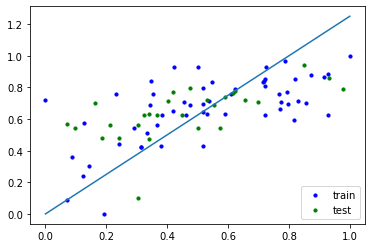

In [14]:
#Plotting initialized parameters line
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_train, y_train, s=10, c='b',  label='train')
ax1.scatter(x_test, y_test, s=10, c='g',  label='test')
line = np.linspace(0,1)
ax1.plot(line,linear_regression(w,line,b))
plt.legend(loc='lower right');
plt.show()

In [15]:
import sys
epochs = 1000    #number of epoches the model will update parameters
lr = .1          #the learning rate the model will multiply by gradient
#To store the best parameters the model got on convergence point
loss = []        
params = []
#The model
for i in range(epochs):
    y_hat = linear_regression(w,x_train,b)
    loss.append(cost(y_train,y_hat))
    params.append([w,b])
    sys.stdout.write('\r'+str(loss[i])+'\t'+str(w)+'\t'+str(b))
    w, b = gradient_descent(x_train,y_hat,y_train,w,b,lr)
print()
print("training set error")
print(np.sum(y_train-y_hat)/np.sum(y_train)*100,'%')
print("test set error")
print((np.sum(linear_regression(w,y_test,b)-y_test)/np.sum(y_test))*100,'%')
best_params = params[loss.index(min(loss))]
print("best params: ",best_params)

0.012448314082841848	0.5255180336551531	0.386542222082585436717
training set error
0.02039857373875802 %
test set error
12.444293401452837 %
best params:  [0.5255180336551531, 0.38654222208258543]


No handles with labels found to put in legend.


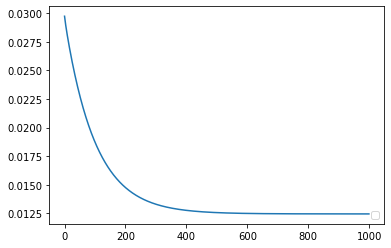

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
line = np.linspace(0,1)
ax1.plot(range(epochs),loss)
plt.legend(loc='lower right');
plt.show()

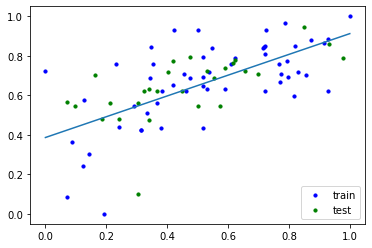

In [17]:
#Plotting my model
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_train, y_train, s=10, c='b',  label='train')
ax1.scatter(x_test, y_test, s=10, c='g',  label='test')
line = np.linspace(0,1)
ax1.plot(line,linear_regression(best_params[0],line,best_params[1]))
plt.legend(loc='lower right');
plt.show()

# Linear regression using sklearn

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()
reg.fit(np.array(x_train).reshape(-1,1),y_train)
print("parameters:\t:",reg.coef_,reg.intercept_)
y_hat = reg.predict(np.array(x_train).reshape(-1,1))
print("train set score:\t",reg.score(np.array((y_hat).reshape(-1,1)),y_train))
y_hat = reg.predict(np.array(x_test).reshape(-1,1))
print("test set score: \t",reg.score(np.array((y_hat).reshape(-1,1)),y_test))

parameters:	: [0.52066456] 0.3892664644924917
train set score:	 0.20491553035339694
test set score: 	 0.1393572043533976


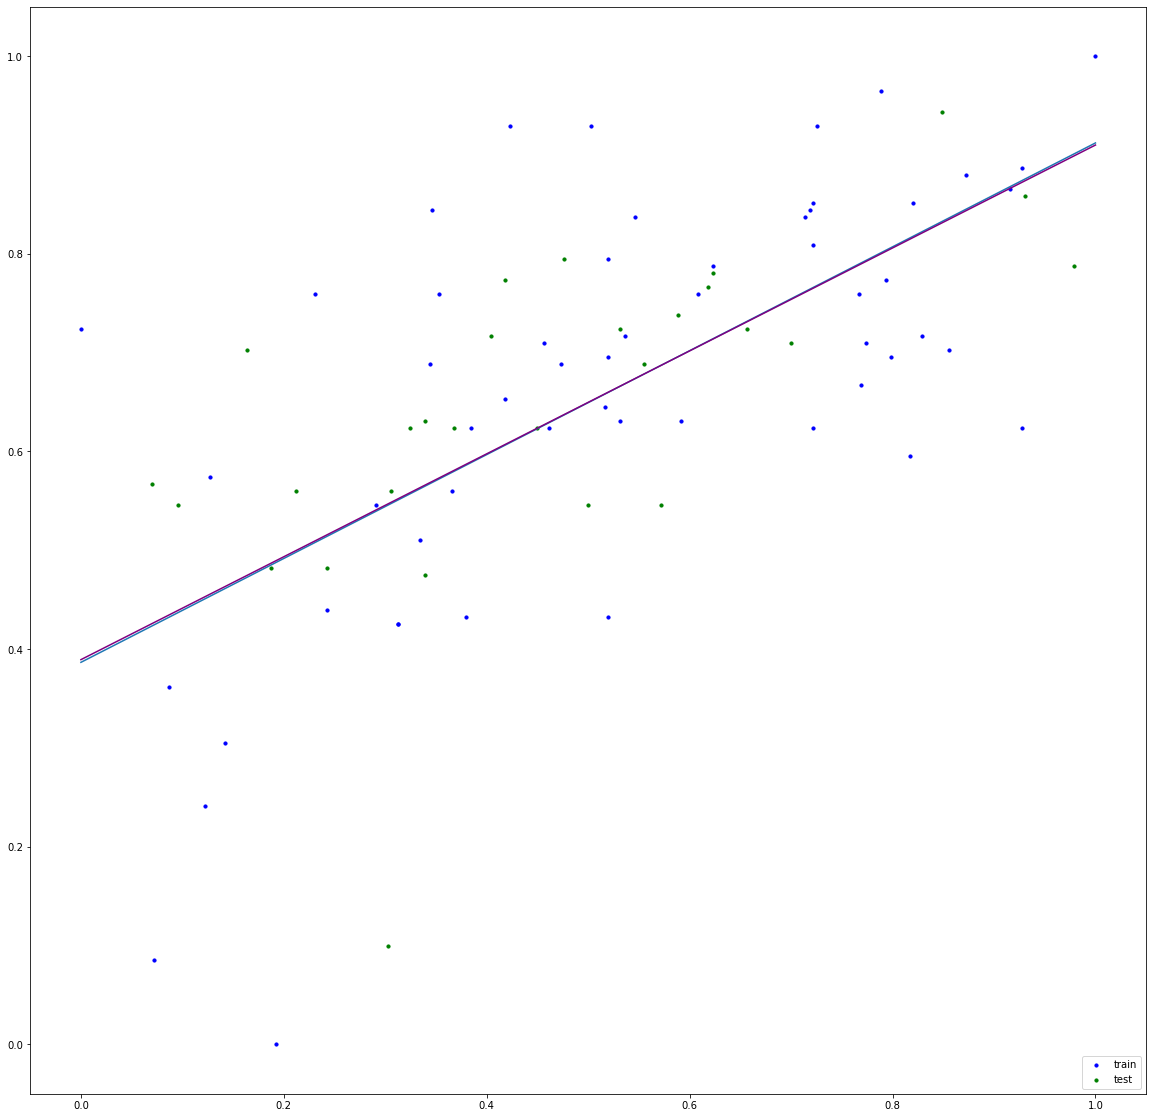

In [20]:
#My model and sklearn model plotted

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(111)

ax1.scatter(x_train, y_train, s=10, c='b',  label='train')
ax1.scatter(x_test, y_test, s=10, c='g',  label='test')
line = np.linspace(0,1)
ax1.plot(line,linear_regression(best_params[0],line,best_params[1]))
ax1.plot(line,0.52066456*line+0.3892664644924917,c = "purple")
plt.legend(loc='lower right');
plt.show()

## As you can see, my implementation and sklearn's are quite similar